<div class="burk">
PART- 2 `( Handling With Missing Vales )`</div><i class="fa fa-lightbulb-o "></i>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats.mstats import winsorize

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
df0=pd.read_csv('auto_scout_cleaned.csv')

In [3]:
df=df0.copy()

In [4]:
df.duplicated().sum()

1675

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df.head().T

,0,1,2,3,4
make_model,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1
body_type,Sedans,Sedans,Sedans,Sedans,Sedans
price,15770,14500,14640,14500,16790
vat,VAT deductible,Price negotiable,VAT deductible,NaN,NaN
km,56013,80000,83450,73000,16200
Type,Used,Used,Used,Used,Used
Previous_Owners,2.000,NaN,1.000,1.000,1.000
Warranty,NaN,NaN,NaN,NaN,NaN
Nr_of_Doors,5.000,3.000,4.000,3.000,5.000
Nr_of_Seats,5.000,4.000,4.000,4.000,5.000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14244 entries, 0 to 15916
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           14244 non-null  object 
 1   body_type            14198 non-null  object 
 2   price                14244 non-null  int64  
 3   vat                  10255 non-null  object 
 4   km                   14244 non-null  int64  
 5   Type                 14242 non-null  object 
 6   Previous_Owners      8506 non-null   float64
 7   Warranty             4267 non-null   float64
 8   Nr_of_Doors          14104 non-null  float64
 9   Nr_of_Seats          13392 non-null  float64
 10  Gearing_Type         14244 non-null  object 
 11  Cylinders            9292 non-null   float64
 12  Drive_Chain          7999 non-null   object 
 13  Fuel                 14244 non-null  object 
 14  Emission_Class       10995 non-null  object 
 15  comfort_convenience  13479 non-null 

In [8]:
df.shape

(14244, 32)

In [9]:
df.isnull().sum()

make_model                 0
body_type                 46
price                      0
vat                     3989
km                         0
Type                       2
Previous_Owners         5738
Warranty                9977
Nr_of_Doors              140
Nr_of_Seats              852
Gearing_Type               0
Cylinders               4952
Drive_Chain             6245
Fuel                       0
Emission_Class          3249
comfort_convenience      765
entertainment_media     1150
Extras                  2524
safety_security          803
Gears                   4140
age                     1321
hp_kW                      0
Inspection_new         10595
Paint_Type              5053
Upholstery_type         4213
Upholstery_color        4614
Displacement_cc          362
Weight_kg               6264
cons_comb               1807
cons_city               2270
cons_country            2210
CO2_Emission            2239
dtype: int64

In [10]:
(df.isnull().sum()*100 / df.shape[0]).sort_values(ascending=False)    #percent of null values in columns

Inspection_new        74.382
Warranty              70.044
Weight_kg             43.976
Drive_Chain           43.843
Previous_Owners       40.284
Paint_Type            35.475
Cylinders             34.766
Upholstery_color      32.393
Upholstery_type       29.577
Gears                 29.065
vat                   28.005
Emission_Class        22.810
Extras                17.720
cons_city             15.937
CO2_Emission          15.719
cons_country          15.515
cons_comb             12.686
age                    9.274
entertainment_media    8.074
Nr_of_Seats            5.981
safety_security        5.637
comfort_convenience    5.371
Displacement_cc        2.541
Nr_of_Doors            0.983
body_type              0.323
Type                   0.014
hp_kW                  0.000
Fuel                   0.000
Gearing_Type           0.000
km                     0.000
price                  0.000
make_model             0.000
dtype: float64

# Missing Data Percentage List

In [11]:
# % of missing.
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

make_model - 0%
body_type - 0%
price - 0%
vat - 28%
km - 0%
Type - 0%
Previous_Owners - 40%
Warranty - 70%
Nr_of_Doors - 1%
Nr_of_Seats - 6%
Gearing_Type - 0%
Cylinders - 35%
Drive_Chain - 44%
Fuel - 0%
Emission_Class - 23%
comfort_convenience - 5%
entertainment_media - 8%
Extras - 18%
safety_security - 6%
Gears - 29%
age - 9%
hp_kW - 0%
Inspection_new - 74%
Paint_Type - 35%
Upholstery_type - 30%
Upholstery_color - 32%
Displacement_cc - 3%
Weight_kg - 44%
cons_comb - 13%
cons_city - 16%
cons_country - 16%
CO2_Emission - 16%


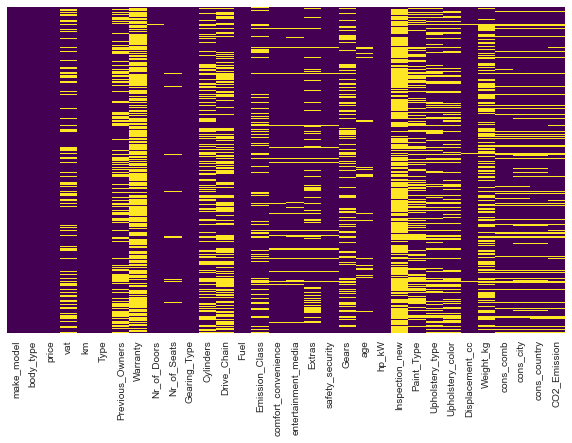

In [12]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis');

# Columns & some helpful functions for filling columns

In [13]:
df.columns

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'Type',
       'Previous_Owners', 'Warranty', 'Nr_of_Doors', 'Nr_of_Seats',
       'Gearing_Type', 'Cylinders', 'Drive_Chain', 'Fuel', 'Emission_Class',
       'comfort_convenience', 'entertainment_media', 'Extras',
       'safety_security', 'Gears', 'age', 'hp_kW', 'Inspection_new',
       'Paint_Type', 'Upholstery_type', 'Upholstery_color', 'Displacement_cc',
       'Weight_kg', 'cons_comb', 'cons_city', 'cons_country', 'CO2_Emission'],
      dtype='object')

In [14]:
# We defined a function that shows the first info of the column

def info(col):
    print("Column Name    : ", col)
    print("--------------------------------")
    print("Number of Nulls       : ", df[col].isnull().sum())
    print("Percentage of Nulls   : ", "%", round(df[col].isnull().sum()/df.shape[0]*100, 2))
    print("Number of Uniques     : ", df[col].nunique())
    print("\n--------------------------------")
    print(df[col].value_counts(dropna = False))

In [15]:
def fillallmethod(df, group_col1, group_col2, col_name, method): # method can be "mode" or "mean" or "ffill"
    if method == "mode":
        for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond1 = df[group_col1]==group1
                cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
                mode1 = list(df[cond1][col_name].mode())
                mode2 = list(df[cond2][col_name].mode())
                if mode2 != []:
                    df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[cond2][col_name].mode()[0])
                elif mode1 != []:
                    df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[cond1][col_name].mode()[0])
                else:
                    df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[col_name].mode()[0])
                
    elif method == "mean":
        for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond1 = df[group_col1]==group1
                cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
                df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[cond2][col_name].mean()).fillna(df[cond1][col_name].mean()).fillna(df[col_name].mean())


    elif method == "median":
        for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond1 = df[group_col1]==group1
                cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
                df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[cond2][col_name].median()).fillna(df[cond1][col_name].median()).fillna(df[col_name].mean())

    elif method == "ffill":           
        for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
                df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(method="ffill").fillna(method="bfill")
                
        for group1 in list(df[group_col1].unique()):
            cond1 = df[group_col1]==group1
            df.loc[cond1, col_name] = df.loc[cond1, col_name].fillna(method="ffill").fillna(method="bfill")            
           
        df[col_name] = df[col_name].fillna(method="ffill").fillna(method="bfill")
    
    print("Number of NaN : ",df[col_name].isnull().sum())
    print("------------------")
    print(df[col_name].value_counts(dropna=False))

In [16]:
def fillmean(df, group_col1, col_name,method): # method can be  "mean" 
    if method == "mean":
        for group1 in list(df[group_col1].unique()):
            cond1 = df[group_col1]==group1
            df.loc[cond1, col_name] = df.loc[cond1, col_name].fillna(df[cond1][col_name].mean()).fillna(df[col_name].mean())

In [17]:
def fill_most_frq(df, group_col, col_name):
    #Fills the missing values with the most existing value (mode) in the relevant column according to single-stage grouping
    for group in list(df[group_col].unique()):
        cond = df[group_col]==group
        mode = list(df[cond][col_name].mode())
        if mode != []:
            df.loc[cond, col_name] = df.loc[cond, col_name].fillna(df[cond][col_name].mode()[0])
        else:
            df.loc[cond, col_name] = df.loc[cond, col_name].fillna(df[col_name].mode()[0])
    print("Number of NaN : ",df[col_name].isnull().sum())
    print("------------------")
    print(df[col_name].value_counts(dropna=False))

In [18]:
def fill_prop(df, group_col, col_name):
    #Fills the missing values with "ffill and bfill method" according to single-stage grouping'''
    for group in list(df[group_col].unique()):
        cond = df[group_col]==group
        df.loc[cond, col_name] = df.loc[cond, col_name].fillna(method="ffill").fillna(method="bfill")
    df[col_name] = df[col_name].fillna(method="ffill").fillna(method="bfill")
    print("Number of NaN : ",df[col_name].isnull().sum())
    print("------------------")
    print(df[col_name].value_counts(dropna=False))

## make_model

In [19]:
info('make_model')

Column Name    :  make_model
--------------------------------
Number of Nulls       :  0
Percentage of Nulls   :  % 0.0
Number of Uniques     :  9

--------------------------------
Audi A3           2754
Opel Insignia     2399
Audi A1           2378
Opel Astra        2308
Opel Corsa        2012
Renault Clio      1477
Renault Espace     881
Renault Duster      34
Audi A2              1
Name: make_model, dtype: int64


## body_type

In [20]:
info('body_type')

Column Name    :  body_type
--------------------------------
Number of Nulls       :  46
Percentage of Nulls   :  % 0.32
Number of Uniques     :  9

--------------------------------
Sedans           7124
Station wagon    3278
Compact          2635
Van               704
Other             281
Transporter        87
Off-Road           56
NaN                46
Coupe              25
Convertible         8
Name: body_type, dtype: int64


In [21]:
df[df.body_type=='Other']

,make_model,body_type,price,vat,km,Type,Previous_Owners,Warranty,Nr_of_Doors,Nr_of_Seats,Gearing_Type,Cylinders,Drive_Chain,Fuel,Emission_Class,comfort_convenience,entertainment_media,Extras,safety_security,Gears,age,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Upholstery_color,Displacement_cc,Weight_kg,cons_comb,cons_city,cons_country,CO2_Emission
744,Audi A1,Other,23490,NaN,22001,Used,NaN,3.000,5.000,5.000,Semi-automatic,4.000,NaN,Benzine,NaN,"Air conditioning,Automatic climate control,Cru...","CD player,On-board computer","Roof rack,Sport seats","Adaptive Cruise Control,Central door lock,Driv...",7.000,2.000,140.000,NaN,NaN,NaN,NaN,NaN,1205.000,5.800,7.400,4.900,134.000
1764,Audi A1,Other,16590,VAT deductible,5300,Used,1.000,NaN,5.000,5.000,Manual,3.000,front,Benzine,Euro6,"Air conditioning,Automatic climate control,Ele...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Cab or rented Car,Sport seats","ABS,Daytime running lights,Driver-side airbag,...",5.000,1.000,60.000,NaN,Metallic,Cloth,NaN,999.000,NaN,4.200,5.000,3.700,97.000
1793,Audi A1,Other,16900,VAT deductible,18950,Employee's car,1.000,NaN,5.000,4.000,Manual,4.000,front,Diesel,Euro6,"Air conditioning,Armrest,Electrical side mirro...","Bluetooth,On-board computer,Radio",Alloy wheels,"ABS,Central door lock,Daytime running lights,D...",5.000,1.000,85.000,NaN,Metallic,Cloth,Black,1598.000,NaN,3.800,4.600,3.300,99.000
1819,Audi A1,Other,16900,VAT deductible,26980,Employee's car,1.000,NaN,5.000,5.000,Manual,4.000,front,Diesel,Euro6,"Air conditioning,Armrest,Electrical side mirro...","Bluetooth,CD player,Hands-free equipment,On-bo...",Alloy wheels,"ABS,Central door lock,Driver-side airbag,Elect...",5.000,1.000,85.000,NaN,Metallic,Cloth,Black,1598.000,1250.000,3.800,4.600,3.300,99.000
2047,Audi A1,Other,26900,VAT deductible,2000,Demonstration,1.000,NaN,5.000,5.000,Automatic,3.000,front,Benzine,NaN,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Catalytic Converter,Shift paddles...","ABS,Central door lock,Central door lock with r...",7.000,0.000,85.000,NaN,Metallic,Cloth,Black,999.000,NaN,4.800,5.800,4.200,108.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15276,Renault Espace,Other,17500,VAT deductible,118596,Used,NaN,12.000,5.000,5.000,Automatic,4.000,front,Diesel,Euro6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,MP3,On-board co...","Alloy wheels,Sport seats,Touch screen","ABS,Central door lock,Daytime running lights,D...",6.000,3.000,118.000,NaN,Metallic,Part leather,Grey,1598.000,1734.000,4.700,5.100,4.400,120.000
15302,Renault Espace,Other,42681,VAT deductible,14900,Demonstration,1.000,NaN,5.000,7.000,Manual,NaN,front,Benzine,Euro6,"Air conditioning,Automatic climate control,Cru...","Bluetooth,CD player,Hands-free equipment,Radio","Alloy wheels,Sport suspension","ABS,Blind spot monitor,Central door lock,Dayti...",NaN,0.000,165.000,Yes,Metallic,Full leather,Brown,1798.000,NaN,7.400,9.100,6.300,168.000
15303,Renault Espace,Other,32900,NaN,19600,Used,NaN,12.000,NaN,NaN,Manual,NaN,NaN,Diesel,NaN,"Air conditioning,Automatic climate control,Ele...",NaN,NaN,NaN,NaN,3.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15353,Renault Espace,Other,27900,VAT deductible,76591,Used,NaN,NaN,5.000,7.000,Automatic,4.000,NaN,Diesel,Euro6,"Air conditioning,Armrest,Automatic climate con...",On-board computer,Alloy wheels,"ABS,Central door lock,Driver-side airbag,Elect...",6.000,2.000,118.000,NaN,Metallic,Part leather,Black,1598.000,1635.000,4.600,5.000,4.400,120.000


In [22]:
df.body_type.replace('Other', np.nan, inplace=True)

In [23]:
df.body_type.value_counts(dropna=False)

Sedans           7124
Station wagon    3278
Compact          2635
Van               704
NaN               327
Transporter        87
Off-Road           56
Coupe              25
Convertible         8
Name: body_type, dtype: int64

In [24]:
fill_most_frq(df, "make_model", "body_type")

Number of NaN :  0
------------------
Sedans           7217
Station wagon    3396
Compact          2723
Van               732
Transporter        87
Off-Road           56
Coupe              25
Convertible         8
Name: body_type, dtype: int64


In [25]:
df.body_type.value_counts(dropna=False)

Sedans           7217
Station wagon    3396
Compact          2723
Van               732
Transporter        87
Off-Road           56
Coupe              25
Convertible         8
Name: body_type, dtype: int64

## price

In [26]:
info('price')

Column Name    :  price
--------------------------------
Number of Nulls       :  0
Percentage of Nulls   :  % 0.0
Number of Uniques     :  2956

--------------------------------
14990    123
15990    121
15900    105
17990    100
10990     95
        ... 
23620      1
23755      1
23740      1
23845      1
39875      1
Name: price, Length: 2956, dtype: int64


## vat

In [27]:
info('vat')

Column Name    :  vat
--------------------------------
Number of Nulls       :  3989
Percentage of Nulls   :  % 28.0
Number of Uniques     :  2

--------------------------------
VAT deductible      9830
NaN                 3989
Price negotiable     425
Name: vat, dtype: int64


In [28]:
df.vat.value_counts(dropna=False)

VAT deductible      9830
NaN                 3989
Price negotiable     425
Name: vat, dtype: int64

In [29]:
fillallmethod(df, "price","age","vat", "mode")

Number of NaN :  224
------------------
VAT deductible      13303
Price negotiable      717
NaN                   224
Name: vat, dtype: int64


In [30]:
df.drop('vat', axis=1, inplace=True) #the both columns vat and price have same proportion in ratio, that's why we can drop it.

## age

In [31]:
info('age')

Column Name    :  age
--------------------------------
Number of Nulls       :  1321
Percentage of Nulls   :  % 9.27
Number of Uniques     :  4

--------------------------------
1.000    4281
3.000    3316
2.000    2899
0.000    2427
NaN      1321
Name: age, dtype: int64


In [32]:
df['age'].fillna('-', inplace=True)

In [33]:
df.groupby('age').km.value_counts(dropna=False)

age  km   
0.0  10       443
     0        132
     1        130
     50        92
     5000      79
             ... 
-    68485      1
     81800      1
     85000      1
     89692      1
     89982      1
Name: km, Length: 7519, dtype: int64

In [34]:
df[df["age"] == "-"]["km"].value_counts(dropna=False)

0        729
10       253
1        138
5         50
20        24
15        20
8         11
11        10
50        10
100        8
7          7
12         6
3          4
9          4
25         3
30         3
4          3
3000       2
2          2
22627      2
325        1
250        1
89982      1
11000      1
6100       1
40         1
77         1
99         1
19500      1
4307       1
500        1
3500       1
89692      1
784        1
497        1
196        1
20768      1
150        1
34164      1
4500       1
32084      1
39962      1
142        1
81800      1
6          1
68485      1
85000      1
281        1
60         1
11200      1
141        1
5000       1
Name: km, dtype: int64

In [35]:
cond1 = (df['km'] < 10000)
cond2 = ((df['km'] >= 10000) & (df['km'] < 28000))
cond3 = ((df['km'] >= 28000) & (df['km'] < 50000))
cond4 = (df['km'] >= 50000)

In [36]:
df.loc[cond1,'age'] = df.loc[cond1,'age'].replace('-', 0)
df.loc[cond2,'age'] = df.loc[cond2,'age'].replace('-', 1)
df.loc[cond3,'age'] = df.loc[cond3,'age'].replace('-', 2)
df.loc[cond4,'age'] = df.loc[cond4,'age'].replace('-', 3)

In [37]:
df.groupby('age').km.mean()

age
0.000    1480.715
1.000   17940.846
2.000   42277.721
3.000   76602.034
Name: km, dtype: float64

In [38]:
df["age"].value_counts(dropna=False)

1.000    4287
0.000    3734
3.000    3321
2.000    2902
Name: age, dtype: int64

In [39]:
df.groupby(['make_model',"body_type", 'age']).price.describe()

count      mean      std       min  \
make_model     body_type   age                                          
Audi A1        Compact     0.000 291.000 23605.113 3440.826 14900.000   
                           1.000 260.000 18551.104 2645.427 13980.000   
                           2.000 132.000 16681.402 2217.591 10999.000   
                           3.000 208.000 14475.774 2017.945  9950.000   
               Coupe       2.000   1.000 15900.000      NaN 15900.000   
...                                  ...       ...      ...       ...   
Renault Espace Transporter 3.000  37.000 21124.297 3279.229 14999.000   
               Van         0.000 212.000 40293.160 8088.592 24200.000   
                           1.000 204.000 31921.627 4076.114 23099.000   
                           2.000 110.000 26837.545 3732.463 14600.000   
                           3.000 201.000 22223.090 3308.265 12614.000   

                                       25%       50%       75%       max  
make_model     body_type   age                                            
Audi A1        Compact     0.000 21145.000 22750.000 26980.000 31990.000  
                           1.000 16445.000 16969.000 20950.000 23829.000  
                           2.000 15437.500 15900.000 17970.000 22150.000  
                           3.000 13372.500 13947.500 15859.750 18900.000  
               Coupe       2.000 15900.000 15900.000 15900.000 15900.000  
...                                    ...       ...       ...       ...  
Renault Espace Transporter 3.000 19000.000 20500.000 24200.000 30000.000  
               Van         0.000 33931.250 39030.000 45990.000 68320.000  
                           1.000 29385.000 31940.000 34990.000 38990.000  
                           2.000 24722.500 27189.500 28986.250 33800.000  
                           3.000 19900.000 22390.000 24750.000 32900.000  

[126 rows x 8 columns]

In [40]:
df['age'].replace('-', 0, inplace=True)

In [41]:
df.groupby('age').km.mean()

age
0.000    1480.715
1.000   17940.846
2.000   42277.721
3.000   76602.034
Name: km, dtype: float64

In [42]:
df["age"].value_counts(dropna=False)

1.000    4287
0.000    3734
3.000    3321
2.000    2902
Name: age, dtype: int64

## km

In [43]:
info('km')

Column Name    :  km
--------------------------------
Number of Nulls       :  0
Percentage of Nulls   :  % 0.0
Number of Uniques     :  6689

--------------------------------
0       896
10      759
1       289
5       132
50      118
       ... 
3806      1
6300      1
126       1
3339      1
57        1
Name: km, Length: 6689, dtype: int64


## Type

In [44]:
info('Type')

Column Name    :  Type
--------------------------------
Number of Nulls       :  2
Percentage of Nulls   :  % 0.01
Number of Uniques     :  5

--------------------------------
Used              10155
New                1370
Pre-registered     1044
Employee's car      904
Demonstration       769
NaN                   2
Name: Type, dtype: int64


In [45]:
fill_most_frq(df, 'price', 'Type')

Number of NaN :  0
------------------
Used              10156
New                1370
Pre-registered     1045
Employee's car      904
Demonstration       769
Name: Type, dtype: int64


In [46]:
df.Type.value_counts(dropna=False)

Used              10156
New                1370
Pre-registered     1045
Employee's car      904
Demonstration       769
Name: Type, dtype: int64

## Previous_Owners

In [47]:
info('Previous_Owners')

Column Name    :  Previous_Owners
--------------------------------
Number of Nulls       :  5738
Percentage of Nulls   :  % 40.28
Number of Uniques     :  5

--------------------------------
1.000    7667
NaN      5738
2.000     642
0.000     178
3.000      17
4.000       2
Name: Previous_Owners, dtype: int64


In [48]:
df['Previous_Owners'].fillna('-', inplace = True)

In [49]:
df.Previous_Owners.value_counts(dropna=False)

1.0    7667
-      5738
2.0     642
0.0     178
3.0      17
4.0       2
Name: Previous_Owners, dtype: int64

In [50]:
df['Previous_Owners'].replace('-', np.nan, inplace=True)

In [51]:
df.groupby(['make_model', 'body_type', 'age', 'Previous_Owners']).price.describe()

count      mean      std  \
make_model     body_type age   Previous_Owners                              
Audi A1        Compact   0.000 0.000            11.000 22466.273 2298.725   
                               1.000            76.000 23484.500 3444.173   
                               2.000             1.000 21760.000      NaN   
                         1.000 1.000           192.000 18110.318 2390.177   
                               2.000             5.000 19261.800 2528.799   
...                                                ...       ...      ...   
Renault Espace Van       2.000 1.000            29.000 25965.172 3687.371   
                               2.000            11.000 27272.091 3605.443   
                         3.000 0.000             1.000 24900.000      NaN   
                               1.000           100.000 21678.720 3571.088   
                               2.000            14.000 23641.000 2699.715   

                                                     min       25%       50%  \
make_model     body_type age   Previous_Owners                                 
Audi A1        Compact   0.000 0.000           19490.000 21299.500 22400.000   
                               1.000           14900.000 21450.000 22900.000   
                               2.000           21760.000 21760.000 21760.000   
                         1.000 1.000           13980.000 16430.000 16930.000   
                               2.000           16960.000 16980.000 18470.000   
...                                                  ...       ...       ...   
Renault Espace Van       2.000 1.000           16950.000 23990.000 26990.000   
                               2.000           19450.000 25570.000 27289.000   
                         3.000 0.000           24900.000 24900.000 24900.000   
                               1.000           12614.000 19009.750 21982.500   
                               2.000           19490.000 21474.250 23495.000   

                                                     75%       max  
make_model     body_type age   Previous_Owners                      
Audi A1        Compact   0.000 0.000           22720.000 28650.000  
                               1.000           26210.000 29179.000  
                               2.000           21760.000 21760.000  
                         1.000 1.000           19988.500 23829.000  
                               2.000           21949.000 21950.000  
...                                                  ...       ...  
Renault Espace Van       2.000 1.000           28900.000 31775.000  
                               2.000           28925.000 33285.000  
                         3.000 0.000           24900.000 24900.000  
                               1.000           24637.500 27900.000  
                               2.000           25933.750 27900.000  

[211 rows x 8 columns]

In [52]:
df.groupby(['make_model', 'body_type', 'age', 'Previous_Owners']).km.describe()

count      mean       std  \
make_model     body_type age   Previous_Owners                               
Audi A1        Compact   0.000 0.000            11.000     2.727     4.921   
                               1.000            76.000  4326.553  3360.385   
                               2.000             1.000  3000.000       NaN   
                         1.000 1.000           192.000 13914.026  8400.783   
                               2.000             5.000 10160.000  1844.722   
...                                                ...       ...       ...   
Renault Espace Van       2.000 1.000            29.000 41765.034 26330.052   
                               2.000            11.000 29364.545 14182.392   
                         3.000 0.000             1.000 91883.000       NaN   
                               1.000           100.000 78350.720 37367.590   
                               2.000            14.000 52909.643 14193.461   

                                                     min       25%       50%  \
make_model     body_type age   Previous_Owners                                 
Audi A1        Compact   0.000 0.000               0.000     0.000     0.000   
                               1.000               1.000  2425.000  3500.000   
                               2.000            3000.000  3000.000  3000.000   
                         1.000 1.000             973.000  6694.250 11202.500   
                               2.000            7500.000  9500.000 10000.000   
...                                                  ...       ...       ...   
Renault Espace Van       2.000 1.000           10400.000 20862.000 31501.000   
                               2.000            5600.000 18000.000 31221.000   
                         3.000 0.000           91883.000 91883.000 91883.000   
                               1.000            3532.000 53058.000 75000.000   
                               2.000           26450.000 44350.000 51972.500   

                                                     75%        max  
make_model     body_type age   Previous_Owners                       
Audi A1        Compact   0.000 0.000               4.000     15.000  
                               1.000            6000.000  14900.000  
                               2.000            3000.000   3000.000  
                         1.000 1.000           22285.000  33360.000  
                               2.000           11800.000  12000.000  
...                                                  ...        ...  
Renault Espace Van       2.000 1.000           52285.000 113100.000  
                               2.000           39000.000  49606.000  
                         3.000 0.000           91883.000  91883.000  
                               1.000           96081.250 197414.000  
                               2.000           63921.250  72118.000  

[211 rows x 8 columns]

In [53]:
fill_prop(df, "age", "Previous_Owners")

Number of NaN :  0
------------------
1.000    12705
2.000     1008
0.000      499
3.000       30
4.000        2
Name: Previous_Owners, dtype: int64


In [54]:
df.Previous_Owners.value_counts(dropna=False)

1.000    12705
2.000     1008
0.000      499
3.000       30
4.000        2
Name: Previous_Owners, dtype: int64

## Warranty

In [55]:
info('Warranty')

Column Name    :  Warranty
--------------------------------
Number of Nulls       :  9977
Percentage of Nulls   :  % 70.04
Number of Uniques     :  41

--------------------------------
NaN       9977
12.000    2245
24.000    1010
60.000     391
36.000     178
48.000     133
6.000      125
72.000      59
3.000       33
18.000      10
23.000      10
20.000       7
25.000       6
2.000        5
50.000       4
16.000       4
4.000        3
1.000        3
19.000       3
34.000       3
26.000       3
13.000       3
28.000       2
22.000       2
14.000       2
11.000       2
46.000       2
21.000       2
9.000        2
17.000       2
45.000       2
33.000       1
40.000       1
65.000       1
10.000       1
15.000       1
7.000        1
8.000        1
56.000       1
49.000       1
47.000       1
30.000       1
Name: Warranty, dtype: int64


In [56]:
df.groupby(["Warranty"])['price'].describe(include='O')

,count,mean,std,min,25%,50%,75%,max
Warranty,,,,,,,,
1.000,3.000,18383.333,4269.292,13455.000,17100.000,20745.000,20847.500,20950.000
2.000,5.000,14604.000,2709.369,10750.000,12990.000,15290.000,16990.000,17000.000
3.000,33.000,16278.212,8782.362,5800.000,8900.000,14950.000,17990.000,39990.000
4.000,3.000,19666.667,7922.331,11200.000,16050.000,20900.000,23900.000,26900.000
6.000,125.000,14608.704,6033.523,5900.000,8790.000,13990.000,18900.000,33800.000
7.000,1.000,21480.000,NaN,21480.000,21480.000,21480.000,21480.000,21480.000
8.000,1.000,17500.000,NaN,17500.000,17500.000,17500.000,17500.000,17500.000
9.000,2.000,10797.500,0.707,10797.000,10797.250,10797.500,10797.750,10798.000
10.000,1.000,19990.000,NaN,19990.000,19990.000,19990.000,19990.000,19990.000


In [57]:
fill_most_frq(df, "age", "Warranty")

Number of NaN :  0
------------------
12.000    9511
24.000    3721
60.000     391
36.000     178
48.000     133
6.000      125
72.000      59
3.000       33
23.000      10
18.000      10
20.000       7
25.000       6
2.000        5
50.000       4
16.000       4
4.000        3
1.000        3
19.000       3
34.000       3
26.000       3
13.000       3
28.000       2
22.000       2
14.000       2
11.000       2
46.000       2
21.000       2
9.000        2
17.000       2
45.000       2
33.000       1
40.000       1
65.000       1
10.000       1
15.000       1
7.000        1
8.000        1
56.000       1
49.000       1
47.000       1
30.000       1
Name: Warranty, dtype: int64


In [58]:
df.drop("Warranty", axis=1, inplace=True) #it has too much null values.

## Nr_of_Doors

In [59]:
info('Nr_of_Doors')

Column Name    :  Nr_of_Doors
--------------------------------
Number of Nulls       :  140
Percentage of Nulls   :  % 0.98
Number of Uniques     :  6

--------------------------------
5.000    10387
4.000     2770
3.000      751
2.000      194
NaN        140
1.000        1
7.000        1
Name: Nr_of_Doors, dtype: int64


In [60]:
fillallmethod(df, "make_model", "body_type", "Nr_of_Doors", "mode")

Number of NaN :  0
------------------
5.000    10527
4.000     2770
3.000      751
2.000      194
1.000        1
7.000        1
Name: Nr_of_Doors, dtype: int64


## Nr_of_Seats

In [61]:
info('Nr_of_Seats')

Column Name    :  Nr_of_Seats
--------------------------------
Number of Nulls       :  852
Percentage of Nulls   :  % 5.98
Number of Uniques     :  6

--------------------------------
5.000    11921
4.000     1072
NaN        852
7.000      310
2.000       86
6.000        2
3.000        1
Name: Nr_of_Seats, dtype: int64


In [62]:
fillallmethod(df, "make_model", "body_type", "Nr_of_Seats", "mode")

Number of NaN :  0
------------------
5.000    12768
4.000     1074
7.000      310
2.000       89
6.000        2
3.000        1
Name: Nr_of_Seats, dtype: int64


## Gearing_Type 

In [63]:
info('Gearing_Type')

Column Name    :  Gearing_Type
--------------------------------
Number of Nulls       :  0
Percentage of Nulls   :  % 0.0
Number of Uniques     :  3

--------------------------------
Manual            7236
Automatic         6544
Semi-automatic     464
Name: Gearing_Type, dtype: int64


## Cylinders

In [64]:
info('Cylinders')

Column Name    :  Cylinders
--------------------------------
Number of Nulls       :  4952
Percentage of Nulls   :  % 34.77
Number of Uniques     :  7

--------------------------------
4.000    7340
NaN      4952
3.000    1922
5.000      22
6.000       3
8.000       2
2.000       2
1.000       1
Name: Cylinders, dtype: int64


In [65]:
fillallmethod(df, "make_model", "Weight_kg", "Cylinders", "ffill")

Number of NaN :  0
------------------
4.000    11298
3.000     2905
5.000       26
8.000        5
2.000        5
6.000        3
1.000        2
Name: Cylinders, dtype: int64


In [66]:
df.drop('Cylinders', axis=1, inplace=True)  # it has similar values with hp_kW, but more null values,so we don't need this column.

## Drive_Chain

In [67]:
info('Drive_Chain')

Column Name    :  Drive_Chain
--------------------------------
Number of Nulls       :  6245
Percentage of Nulls   :  % 43.84
Number of Uniques     :  3

--------------------------------
front    7847
NaN      6245
4WD       148
rear        4
Name: Drive_Chain, dtype: int64


In [68]:
fillallmethod(df,'body_type', 'make_model','Drive_Chain', 'mode')

Number of NaN :  0
------------------
front    14056
4WD        184
rear         4
Name: Drive_Chain, dtype: int64


## Fuel

In [69]:
info('Fuel')

Column Name    :  Fuel
--------------------------------
Number of Nulls       :  0
Percentage of Nulls   :  % 0.0
Number of Uniques     :  4

--------------------------------
Benzine     7595
Diesel      6584
LPG/CNG       60
Electric       5
Name: Fuel, dtype: int64


## Emission_Class

In [70]:
info('Emission_Class')

Column Name    :  Emission_Class
--------------------------------
Number of Nulls       :  3249
Percentage of Nulls   :  % 22.81
Number of Uniques     :  6

--------------------------------
Euro6          9149
NaN            3249
Euro6d-TEMP    1546
Euro6c          121
Euro5            78
Euro6d           61
Euro4            40
Name: Emission_Class, dtype: int64


In [71]:
fillallmethod(df, 'make_model', 'age', 'Emission_Class', 'mode')

Number of NaN :  0
------------------
Euro6          11838
Euro6d-TEMP     2104
Euro6c           121
Euro5             78
Euro6d            61
Euro4             42
Name: Emission_Class, dtype: int64


In [72]:
# The emission class is related to make_model, age and fuel,so we don't need it.

In [73]:
df.drop("Emission_Class", axis=1, inplace=True)

## comfort_convenience

In [74]:
info('comfort_convenience')

Column Name    :  comfort_convenience
--------------------------------
Number of Nulls       :  765
Percentage of Nulls   :  % 5.37
Number of Uniques     :  6198

--------------------------------
NaN                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  765
Air conditioning,Electrical side mirrors,Hill Holder,Power windows                                                                                                                                                                                                                                                         

In [75]:
fillallmethod(df,'make_model', 'body_type', 'comfort_convenience', 'mode')

Number of NaN :  0
------------------
Air conditioning,Electrical side mirrors,Hill Holder,Power windows                                                                                                                                                                                                                                                                                                                                                                                                                                   322
Air conditioning,Armrest,Automatic climate control,Cruise control,Electrical side mirrors,Leather steering wheel,Light sensor,Lumbar support,Multi-function steering wheel,Navigation system,Park Distance Control,Parking assist system sensors front,Parking assist system sensors rear,Power windows,Rain sensor,Seat heating,Start-stop system                                                                                                                                       

## entertainment_media

In [76]:
info('entertainment_media')

Column Name    :  entertainment_media
--------------------------------
Number of Nulls       :  1150
Percentage of Nulls   :  % 8.07
Number of Uniques     :  346

--------------------------------
Bluetooth,Hands-free equipment,On-board computer,Radio,USB                  1187
NaN                                                                         1150
Bluetooth,Hands-free equipment,MP3,On-board computer,Radio,USB               933
Bluetooth,CD player,Hands-free equipment,MP3,On-board computer,Radio,USB     696
On-board computer,Radio                                                      439
                                                                            ... 
Bluetooth,CD player,Digital radio,Hands-free equipment,Radio                   1
CD player,Hands-free equipment,MP3,Radio,USB                                   1
MP3,Radio,Sound system,USB                                                     1
Hands-free equipment,On-board computer,Radio,Sound system                  

In [77]:
fillallmethod(df, 'make_model', 'body_type', 'entertainment_media', 'mode')

Number of NaN :  0
------------------
Bluetooth,Hands-free equipment,On-board computer,Radio,USB                  1550
Bluetooth,Hands-free equipment,MP3,On-board computer,Radio,USB              1079
Bluetooth,CD player,Hands-free equipment,MP3,On-board computer,Radio,USB     796
On-board computer                                                            526
Radio                                                                        497
                                                                            ... 
Bluetooth,CD player,Digital radio,Hands-free equipment,Radio                   1
CD player,Hands-free equipment,MP3,Radio,USB                                   1
MP3,Radio,Sound system,USB                                                     1
Bluetooth,MP3,On-board computer,Sound system,USB                               1
CD player,Digital radio,Radio                                                  1
Name: entertainment_media, Length: 346, dtype: int64


## Extras

In [78]:
info('Extras')

Column Name    :  Extras
--------------------------------
Number of Nulls       :  2524
Percentage of Nulls   :  % 17.72
Number of Uniques     :  659

--------------------------------
Alloy wheels                                                                                               2846
NaN                                                                                                        2524
Alloy wheels,Touch screen                                                                                   610
Alloy wheels,Voice Control                                                                                  529
Alloy wheels,Touch screen,Voice Control                                                                     509
                                                                                                           ... 
Alloy wheels,Handicapped enabled,Shift paddles,Voice Control                                                  1
Alloy wheels,Handicapped enabled

In [79]:
fillallmethod(df, 'make_model', 'body_type', 'Extras', 'mode')

Number of NaN :  0
------------------
Alloy wheels                                                                                               4993
Alloy wheels,Touch screen                                                                                   610
Alloy wheels,Voice Control                                                                                  529
Roof rack                                                                                                   523
Alloy wheels,Touch screen,Voice Control                                                                     517
                                                                                                           ... 
Alloy wheels,Handicapped enabled,Shift paddles,Voice Control                                                  1
Alloy wheels,Handicapped enabled,Shift paddles                                                                1
Alloy wheels,Catalytic Converter,Shift paddles,Sport package,Sport

## safety_security

In [80]:
info('safety_security')

Column Name    :  safety_security
--------------------------------
Number of Nulls       :  803
Percentage of Nulls   :  % 5.64
Number of Uniques     :  4443

--------------------------------
NaN                                                                                                                                                                                                                                                                                                                                                               803
ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Fog lights,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control                                                                                                                                      472
ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control

In [81]:
fillallmethod(df, 'make_model', 'body_type', 'safety_security', 'mode')

Number of NaN :  0
------------------
ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Fog lights,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control                                                                                                                                                                                                                                                          647
ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control                                                                                                                                                                                                                                                                     440
ABS,Central do

## Gears

In [82]:
info('Gears')

Column Name    :  Gears
--------------------------------
Number of Nulls       :  4140
Percentage of Nulls   :  % 29.06
Number of Uniques     :  10

--------------------------------
6.000     5245
NaN       4140
5.000     2926
7.000     1725
8.000      197
9.000        4
1.000        2
3.000        2
2.000        1
50.000       1
4.000        1
Name: Gears, dtype: int64


In [83]:
fillallmethod(df, 'make_model', 'body_type', 'Gears', 'mode')

Number of NaN :  0
------------------
6.000     7582
5.000     4695
7.000     1759
8.000      197
9.000        4
1.000        2
3.000        2
2.000        1
50.000       1
4.000        1
Name: Gears, dtype: int64


## hp_kW

In [84]:
info('hp_kW')

Column Name    :  hp_kW
--------------------------------
Number of Nulls       :  0
Percentage of Nulls   :  % 0.0
Number of Uniques     :  81

--------------------------------
85.000     2240
66.000     1950
81.000     1253
100.000    1228
110.000    1012
           ... 
84.000        1
195.000       1
44.000        1
239.000       1
137.000       1
Name: hp_kW, Length: 81, dtype: int64


## Inspection_new

In [85]:
info('Inspection_new')

Column Name    :  Inspection_new
--------------------------------
Number of Nulls       :  10595
Percentage of Nulls   :  % 74.38
Number of Uniques     :  1

--------------------------------
NaN    10595
Yes     3649
Name: Inspection_new, dtype: int64


In [86]:
df["Inspection_new"].fillna("No", inplace=True) # if there is no given information in this column, it is most probably 'no'.

In [87]:
df["Inspection_new"].value_counts(dropna=False)

No     10595
Yes     3649
Name: Inspection_new, dtype: int64

## Paint_Type

In [88]:
info('Paint_Type')

Column Name    :  Paint_Type
--------------------------------
Number of Nulls       :  5053
Percentage of Nulls   :  % 35.47
Number of Uniques     :  3

--------------------------------
Metallic       8866
NaN            5053
Uni/basic       319
Perl effect       6
Name: Paint_Type, dtype: int64


In [89]:
fillallmethod(df, 'make_model', 'body_type', 'Paint_Type', 'mode')

Number of NaN :  0
------------------
Metallic       13877
Uni/basic        361
Perl effect        6
Name: Paint_Type, dtype: int64


## Upholstery_type

In [90]:
info('Upholstery_type')

Column Name    :  Upholstery_type
--------------------------------
Number of Nulls       :  4213
Percentage of Nulls   :  % 29.58
Number of Uniques     :  5

--------------------------------
Cloth           7629
NaN             4213
Part leather    1348
Full leather     939
Velour            58
alcantara         57
Name: Upholstery_type, dtype: int64


In [91]:
fillallmethod(df,'make_model', 'body_type', 'Upholstery_type', 'mode')

Number of NaN :  0
------------------
Cloth           11478
Part leather     1357
Full leather     1294
Velour             58
alcantara          57
Name: Upholstery_type, dtype: int64


## Upholstery_color

In [92]:
info('Upholstery_color')

Column Name    :  Upholstery_color
--------------------------------
Number of Nulls       :  4614
Percentage of Nulls   :  % 32.39
Number of Uniques     :  10

--------------------------------
Black     7436
NaN       4614
Grey      1042
Other      859
Brown      200
Beige       51
Blue        15
White       13
Red          9
Yellow       4
Orange       1
Name: Upholstery_color, dtype: int64


In [93]:
fillallmethod(df,"make_model", "body_type", 'Upholstery_color', 'mode')

Number of NaN :  0
------------------
Black     11607
Grey       1081
Other       860
Brown       603
Beige        51
Blue         15
White        13
Red           9
Yellow        4
Orange        1
Name: Upholstery_color, dtype: int64


In [94]:
df.drop("Upholstery_color", axis=1, inplace=True) #It is not needed.

## Displacement_cc

In [95]:
info('Displacement_cc')

Column Name    :  Displacement_cc
--------------------------------
Number of Nulls       :  362
Percentage of Nulls   :  % 2.54
Number of Uniques     :  77

--------------------------------
1598.000    4358
999.000     2217
1398.000    1226
1399.000     661
1956.000     635
            ... 
122.000        1
1198.000       1
1195.000       1
2967.000       1
1800.000       1
Name: Displacement_cc, Length: 78, dtype: int64


In [96]:
fillallmethod(df, 'make_model', 'body_type', 'Displacement_cc', 'mode')

Number of NaN :  0
------------------
1598.000    4563
999.000     2246
1398.000    1271
1399.000     675
1956.000     635
            ... 
122.000        1
1198.000       1
1195.000       1
2967.000       1
1800.000       1
Name: Displacement_cc, Length: 77, dtype: int64


## Weight_kg

In [97]:
info('Weight_kg')

Column Name    :  Weight_kg
--------------------------------
Number of Nulls       :  6264
Percentage of Nulls   :  % 43.98
Number of Uniques     :  434

--------------------------------
NaN         6264
1163.000     513
1360.000     313
1165.000     240
1335.000     221
            ... 
1213.000       1
1960.000       1
1258.000       1
1167.000       1
2037.000       1
Name: Weight_kg, Length: 435, dtype: int64


In [98]:
fillallmethod(df, 'make_model', 'body_type', 'Weight_kg', 'mode')

Number of NaN :  0
------------------
1163.000    1438
1360.000    1192
1487.000     911
1135.000     788
1425.000     706
            ... 
1167.000       1
1331.000       1
1132.000       1
1252.000       1
2037.000       1
Name: Weight_kg, Length: 434, dtype: int64


## cons_comb

In [99]:
info('cons_comb')

Column Name    :  cons_comb
--------------------------------
Number of Nulls       :  1807
Percentage of Nulls   :  % 12.69
Number of Uniques     :  72

--------------------------------
NaN       1807
3.900      675
4.000      634
5.400      628
4.400      601
          ... 
33.000       1
50.000       1
1.000        1
46.000       1
11.000       1
Name: cons_comb, Length: 73, dtype: int64


In [100]:
df['cons_comb'].replace(43.0,4.3, inplace=True, regex=True)

In [101]:
df['cons_comb'].replace(50.0,0.5, inplace=True, regex=True)

In [102]:
df['cons_comb'].replace(46.0,4.6, inplace=True, regex=True)

In [103]:
df['cons_comb'].replace(55.0,5.5, inplace=True, regex=True)

In [104]:
df['cons_comb'].replace(54.0,5.4, inplace=True, regex=True)

In [105]:
df['cons_comb'].replace(33.0,3.3, inplace=True, regex=True)

In [106]:
df['cons_comb'].replace(11.0,1.1, inplace=True, regex=True)

In [107]:
df['cons_comb'].replace(32.0,3.2, inplace=True, regex=True)

In [108]:
df['cons_comb'].replace(40.0,4.0, inplace=True, regex=True)

In [109]:
df['cons_comb'].replace(51.0,5.1, inplace=True, regex=True)

In [110]:
df['cons_comb'].replace(38.0,3.8, inplace=True, regex=True)

In [111]:
df.cons_comb.value_counts(dropna=False)

NaN      1807
3.900     675
4.000     636
5.400     629
4.400     601
         ... 
1.100       1
9.100       1
1.200       1
0.500       1
1.000       1
Name: cons_comb, Length: 64, dtype: int64

In [112]:
fillallmethod(df, 'Displacement_cc','Fuel','cons_comb','mode')

Number of NaN :  0
------------------
4.000    1269
4.400     866
5.400     764
3.900     707
5.600     627
         ... 
1.100       1
9.100       1
1.200       1
0.500       1
1.000       1
Name: cons_comb, Length: 63, dtype: int64


## cons_city

In [113]:
info('cons_city')

Column Name    :  cons_city
--------------------------------
Number of Nulls       :  2270
Percentage of Nulls   :  % 15.94
Number of Uniques     :  86

--------------------------------
NaN       2270
5.000      607
5.800      564
4.500      546
4.300      492
          ... 
66.000       1
10.400       1
10.500       1
19.900       1
9.700        1
Name: cons_city, Length: 87, dtype: int64


In [114]:
df.drop('cons_city', axis=1, inplace=True)

## cons_country

In [115]:
info('cons_country')

Column Name    :  cons_country
--------------------------------
Number of Nulls       :  2210
Percentage of Nulls   :  % 15.52
Number of Uniques     :  57

--------------------------------
NaN       2210
4.200     1020
3.700      989
4.400      793
3.800      724
4.500      720
3.900      713
4.700      564
4.100      540
4.000      532
3.500      490
3.600      473
4.600      459
4.900      444
3.300      423
4.300      409
3.100      364
3.400      326
4.800      323
5.300      262
5.400      197
5.100      182
3.200      158
5.700      151
5.600      144
3.000      122
5.000      115
5.200      108
6.300       47
5.500       36
6.000       36
10.000      32
5.800       29
6.600       19
2.900       16
6.400       13
2.800        9
0.000        9
7.700        4
7.300        4
44.000       4
6.500        4
7.000        3
7.100        3
6.900        2
35.000       2
37.000       2
6.100        2
5.900        2
6.700        2
7.800        2
7.600        1
42.000       1
8.000        1
8

In [116]:
df.drop('cons_country', axis=1, inplace=True)

## CO2_Emission

In [117]:
info('CO2_Emission')

Column Name    :  CO2_Emission
--------------------------------
Number of Nulls       :  2239
Percentage of Nulls   :  % 15.72
Number of Uniques     :  120

--------------------------------
NaN        2239
120.000     648
97.000      503
99.000      476
10.000      468
           ... 
12.324        1
80.000        1
160.000       1
331.000       1
193.000       1
Name: CO2_Emission, Length: 121, dtype: int64


In [118]:
fillallmethod(df, 'make_model', 'Fuel', 'CO2_Emission','median' )

Number of NaN :  0
------------------
120.000    964
97.000     753
104.000    670
135.000    532
99.000     476
          ... 
165.000      1
12.324       1
160.000      1
80.000       1
193.000      1
Name: CO2_Emission, Length: 121, dtype: int64


In [119]:
df.columns

Index(['make_model', 'body_type', 'price', 'km', 'Type', 'Previous_Owners',
       'Nr_of_Doors', 'Nr_of_Seats', 'Gearing_Type', 'Drive_Chain', 'Fuel',
       'comfort_convenience', 'entertainment_media', 'Extras',
       'safety_security', 'Gears', 'age', 'hp_kW', 'Inspection_new',
       'Paint_Type', 'Upholstery_type', 'Displacement_cc', 'Weight_kg',
       'cons_comb', 'CO2_Emission'],
      dtype='object')

In [120]:
df.shape

(14244, 25)

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14244 entries, 0 to 15916
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           14244 non-null  object 
 1   body_type            14244 non-null  object 
 2   price                14244 non-null  int64  
 3   km                   14244 non-null  int64  
 4   Type                 14244 non-null  object 
 5   Previous_Owners      14244 non-null  float64
 6   Nr_of_Doors          14244 non-null  float64
 7   Nr_of_Seats          14244 non-null  float64
 8   Gearing_Type         14244 non-null  object 
 9   Drive_Chain          14244 non-null  object 
 10  Fuel                 14244 non-null  object 
 11  comfort_convenience  14244 non-null  object 
 12  entertainment_media  14244 non-null  object 
 13  Extras               14244 non-null  object 
 14  safety_security      14244 non-null  object 
 15  Gears                14244 non-null 

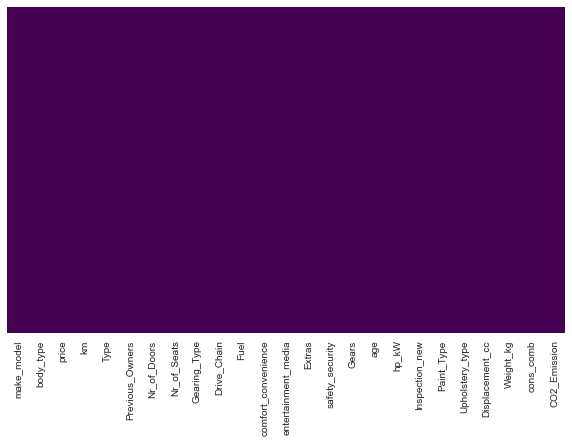

In [122]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis');

In [123]:
df.to_csv('auto_scout_filled.csv', index=False)

'''END'''